# 한글

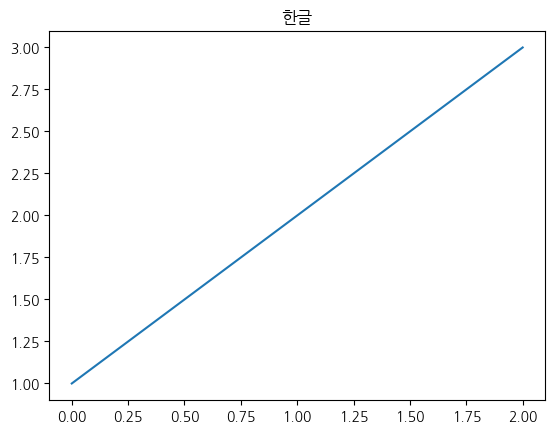

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

# 위아래 합 1퍼센트 제거 데이터프레임의 시작

## 데이터 다시 불러오기

In [2]:
ULS_df = pd.read_csv("data/울산_전처리_ver7_graph.csv")


In [3]:
sorted_ULS_df = ULS_df.sort_values(by='대기율', ascending=True)

sorted_ULS_df.head(5)

,Datetime,ETA_Year,ETA_Month,ETA_Day,ETA_Hour,호출부호,입항일시,출항일시,접안_대기시간_분,출항_대기시간_분,Service_Time_Start,Service_Time_End,계선장소_코드,계선장소_숫자,계선장소명,선박용도,Service_Time_분,대기율,총톤수,재화중량톤수,"선박제원(총길이, m)","선박제원(너비, m)",만재흘수(m),깊이(m),길이1(m),ETA_Minute,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
17508,2020-09-26 07:00:00,2020,9,26,7,200013,2020-09-26 07:30:00,2020-09-28 01:40,2010,1500.0,2020-09-27 17:00:00,2020-09-27 01:00:00,WAM,1,정박지-M1,석유제품 운반선,-960.0,-209.375000,1998.0,3612.258,79.99,14.0,6.0,7.30,79.99,30,12.7,5.0,16.7,1012.0,81.0,20.6,21.9,5.55,3.5,2.5,8.0,25.0
7259,2020-04-18 04:00:00,2020,4,18,4,192827,2020-04-18 04:20:00,2020-04-19 18:25,1780,1650.0,2020-04-19 10:00:00,2020-04-18 16:30:00,WAM,2,정박지-M2,석유제품 운반선,-1050.0,-169.523810,1998.0,3612.258,79.99,14.0,5.8,7.30,79.99,20,2.2,307.0,3.3,1010.1,80.0,15.1,15.9,1.90,1.1,0.8,6.4,197.0
2057,2020-02-01 22:00:00,2020,2,1,22,88238,2020-02-01 22:10:00,2020-02-03 05:25,1490,1300.0,2020-02-02 23:00:00,2020-02-02 08:20:00,MLJ,1,장생포호안,석유제품 운반선,-880.0,-169.318182,700.0,0.000,70.90,12.0,3.9,5.35,66.01,10,8.5,315.0,10.8,1024.3,50.0,9.2,16.1,3.40,2.2,1.6,10.7,49.0
48496,2022-01-09 12:00:00,2022,1,9,12,124810,2022-01-09 12:00:00,2022-01-10 22:25,1665,125.0,2022-01-10 15:45:00,2021-01-10 20:20:00,MLJ,1,장생포호안,석유제품 운반선,-525325.0,-0.316947,1130.0,2286.000,57.00,10.0,5.0,5.95,74.00,0,4.4,4.0,7.3,1021.5,64.0,11.2,15.7,1.90,1.3,0.9,7.1,45.0
0,2020-01-01 01:00:00,2020,1,1,1,88238,2020-01-01 01:05:00,2020-01-01 08:15,0,0.0,2020-01-01 01:05:00,2020-01-01 08:15:00,MBU,1,SK2부두 01,석유제품 운반선,430.0,0.000000,700.0,0.000,70.90,12.0,3.9,5.35,66.01,5,9.3,330.0,12.2,1028.8,43.0,4.3,17.5,4.20,2.8,2.0,10.7,49.0


In [16]:
sorted_ULS_df.describe()

,ETA_Year,ETA_Month,ETA_Day,ETA_Hour,접안_대기시간_분,출항_대기시간_분,계선장소_숫자,Service_Time_분,대기율,총톤수,재화중량톤수,"선박제원(총길이, m)","선박제원(너비, m)",만재흘수(m),깊이(m),길이1(m),ETA_Minute,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
count,72111.000000,72111.000000,72111.000000,72111.000000,72111.000000,72111.000000,72111.000000,7.211100e+04,72111.000000,72111.000000,72111.000000,72111.000000,72111.000000,72111.000000,72111.000000,72111.000000,72111.000000,72111.000000,72111.000000,72111.000000,72111.000000,72111.000000,72111.000000,72111.000000,72111.000000,72111.000000,72111.000000,72111.000000,72111.000000
mean,2021.003092,6.496762,15.832786,12.041991,375.319216,36.198943,3.977243,2.736146e+03,41.058567,8632.084061,12320.383001,96.642573,16.349028,6.199838,8.389712,92.700452,26.233265,5.936533,191.093454,7.949493,1016.276351,71.122113,17.567542,19.823494,1.909407,1.174209,0.834252,6.032919,115.314354
std,0.817506,3.468137,8.785947,6.322324,1166.175989,468.128592,5.159865,1.660611e+04,1578.528174,20093.726202,34031.499938,56.846843,12.823724,3.429391,5.315604,53.852506,17.487326,3.028839,109.916190,3.929136,7.369039,16.398227,6.883254,4.251342,1.039624,0.636626,0.451970,1.995214,97.400041
min,2020.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-5.253250e+05,-209.375000,7.000000,0.000000,11.160000,2.500000,0.000000,0.800000,3.400000,0.000000,0.000000,0.000000,0.100000,841.800000,27.000000,-6.100000,12.400000,0.200000,0.000000,0.000000,2.000000,0.000000
25%,2020.000000,3.000000,8.000000,7.000000,0.000000,0.000000,1.000000,5.100000e+02,0.000000,549.000000,1018.630000,60.090000,10.000000,4.000000,4.600000,60.900000,10.000000,3.500000,71.000000,5.000000,1010.739111,58.000000,12.500000,15.800000,1.117332,0.700000,0.500000,4.600000,41.000000
50%,2021.000000,6.000000,16.000000,12.000000,0.000000,0.000000,2.000000,1.020000e+03,0.000000,1755.000000,2684.000000,81.900000,14.000000,5.000000,6.870000,78.010000,25.000000,5.800000,222.000000,7.600000,1016.400000,71.000000,17.700000,19.400000,1.700000,1.000000,0.700000,5.800000,64.000000
75%,2022.000000,10.000000,23.000000,17.000000,0.000000,0.000000,4.000000,2.285000e+03,0.000000,5667.000000,8782.000000,116.500000,19.200000,7.500000,10.000000,108.900000,40.000000,8.100000,287.000000,10.500000,1021.700000,86.317586,23.100000,23.300000,2.400000,1.500000,1.100000,7.100000,216.000000
max,2022.000000,12.000000,31.000000,23.000000,37488.000000,42600.000000,32.000000,1.020525e+06,421000.000000,228283.000000,324690.000000,685.000000,2402.000000,98.000000,85.000000,385.920000,59.000000,17.900000,360.000000,111.200000,1035.300000,100.000000,32.700000,31.100000,11.500000,6.500000,4.600000,12.800000,360.000000


In [15]:
print(sorted_ULS_df.head())
print(sorted_ULS_df.tail(20))

                  Datetime  ETA_Year  ETA_Month  ETA_Day  ETA_Hour    호출부호  \
17508  2020-09-26 07:00:00      2020          9       26         7  200013   
7259   2020-04-18 04:00:00      2020          4       18         4  192827   
2057   2020-02-01 22:00:00      2020          2        1        22   88238   
48496  2022-01-09 12:00:00      2022          1        9        12  124810   
0      2020-01-01 01:00:00      2020          1        1         1   88238   

                      입항일시              출항일시  접안_대기시간_분  출항_대기시간_분  \
17508  2020-09-26 07:30:00  2020-09-28 01:40       2010     1500.0   
7259   2020-04-18 04:20:00  2020-04-19 18:25       1780     1650.0   
2057   2020-02-01 22:10:00  2020-02-03 05:25       1490     1300.0   
48496  2022-01-09 12:00:00  2022-01-10 22:25       1665      125.0   
0      2020-01-01 01:05:00  2020-01-01 08:15          0        0.0   

        Service_Time_Start     Service_Time_End 계선장소_코드  계선장소_숫자     계선장소명  \
17508  2020-09-27 17:00:00  2020

# 이상치 제거여

In [20]:
# 위 아래 4개의 행 제거
fil_df = sorted_ULS_df.iloc[4:-4]

In [34]:
fil_df.describe()

,ETA_Year,ETA_Month,ETA_Day,ETA_Hour,접안_대기시간_분,출항_대기시간_분,계선장소_숫자,Service_Time_분,대기율,총톤수,재화중량톤수,"선박제원(총길이, m)","선박제원(너비, m)",만재흘수(m),깊이(m),길이1(m),ETA_Minute,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
count,72103.000000,72103.000000,72103.000000,72103.000000,72103.000000,72103.000000,72103.000000,7.210300e+04,72103.000000,72103.000000,72103.000000,72103.000000,72103.000000,72103.000000,72103.000000,72103.000000,72103.000000,72103.000000,72103.000000,72103.000000,72103.000000,72103.000000,72103.000000,72103.000000,72103.000000,72103.000000,72103.000000,72103.000000,72103.000000
mean,2021.003107,6.497025,15.833377,12.041995,375.115099,36.066918,3.977199,2.743775e+03,34.323577,8632.746844,12321.361692,96.644373,16.349218,6.199884,8.389790,92.701888,26.233055,5.936508,191.088712,7.949423,1016.276299,71.122667,17.567790,19.823697,1.909331,1.174155,0.834212,6.032765,115.311740
std,0.817492,3.468113,8.785777,6.322209,1166.046043,467.867031,5.159429,1.649015e+04,106.861845,20094.725980,34033.238112,56.849400,12.824379,3.429551,5.315848,53.855091,17.487334,3.028828,109.912212,3.929122,7.369207,16.398211,6.883291,4.251321,1.039566,0.636580,0.451936,1.995113,97.399666
min,2020.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-4.870050e+05,0.000000,7.000000,0.000000,11.160000,2.500000,0.000000,0.800000,3.400000,0.000000,0.000000,0.000000,0.100000,841.800000,27.000000,-6.100000,12.400000,0.200000,0.000000,0.000000,2.000000,0.000000
25%,2020.000000,3.000000,8.000000,7.000000,0.000000,0.000000,1.000000,5.100000e+02,0.000000,549.000000,1018.630000,60.090000,10.000000,4.000000,4.600000,60.900000,10.000000,3.500000,71.000000,5.000000,1010.739111,58.000000,12.500000,15.800000,1.117332,0.700000,0.500000,4.600000,41.000000
50%,2021.000000,6.000000,16.000000,12.000000,0.000000,0.000000,2.000000,1.020000e+03,0.000000,1755.000000,2684.000000,81.900000,14.000000,5.000000,6.870000,78.010000,25.000000,5.800000,222.000000,7.600000,1016.400000,71.000000,17.700000,19.400000,1.700000,1.000000,0.700000,5.800000,64.000000
75%,2022.000000,10.000000,23.000000,17.000000,0.000000,0.000000,4.000000,2.285000e+03,0.000000,5667.000000,8782.000000,116.500000,19.200000,7.500000,10.000000,108.900000,40.000000,8.100000,287.000000,10.500000,1021.700000,86.325758,23.100000,23.300000,2.400000,1.500000,1.100000,7.100000,216.000000
max,2022.000000,12.000000,31.000000,23.000000,37488.000000,42600.000000,32.000000,1.020525e+06,5808.333333,228283.000000,324690.000000,685.000000,2402.000000,98.000000,85.000000,385.920000,59.000000,17.900000,360.000000,111.200000,1035.300000,100.000000,32.700000,31.100000,11.500000,6.500000,4.600000,12.800000,360.000000


# 선종별 / 컨테이너, 비 컨테이너선 시각화 시작

General Cargo Ship(A), Full-Containership(B), Oil Products Carrier(C), <br>
Bulk Carrier(D), Chemical Tanker(E), Passenger Ship(F),  <br>
Cement Carrier(G), Car Carrier(H), Refrigerator Carrier(I), <br>
LPG Carrier(J), Other Oil Carrier(K), Int’l Car-Ferry(L), <br>
Crude Oil Carrier(M), Coil-Dedicated Ship(N), Sand Carrier(O), <br>
Semi-Containership(P), Steel Product Carrier(Q), LNG Carrier(R), <br>
Cargo-Passenger Ship(S), Chemical Gas Carrier(T),  <br>
Hot Coil Carrier(U), Cruise Ship(V), Coal Carrier(W), Ore Carrier(X) <br>

[total : 24 types]

= > 다음의 분류과정의 필요

## 현재 우리 칼럼의 종류

In [23]:
fil_df['선박용도'].value_counts()

석유제품 운반선       35955
케미칼 운반선         9827
풀컨테이너선          4123
견인용예선           3798
LPG 운반선         3502
일반화물선           3312
기타 예선           1819
기타 유조선          1659
산물선(벌크선)        1520
자동차운반선          1454
원유운반선           1449
급유선             1338
시멘트운반선           531
기타선              465
케미칼가스 운반선        345
압항 예선            192
모래운반선            177
이.접안용 예선         125
철강재 운반선          114
신조선               94
폐기물 운반선           86
관공선               55
LNG 운반선           52
코일전용선             41
용달선               29
세미(혼재)컨테이너선       26
여객선                7
군함                 3
냉동.냉장선             1
수상레저기구             1
기타 부선              1
원목운반선              1
유람선                1
Name: 선박용도, dtype: int64

## 선박 용도별 평균 대기율

## 컨테이너 / 비컨테이너

### 컨테이너

In [30]:
Cont = fil_df[fil_df['선박용도'].isin(['풀컨테이너선', '세미컨테이너선'])]['대기율'].mean()

### 비컨테이너

In [31]:
Non_Cont= fil_df[~fil_df['선박용도'].isin(['풀컨테이너선', '세미컨테이너선'])]['대기율'].mean()

### 둘의 차이 비교 그래프

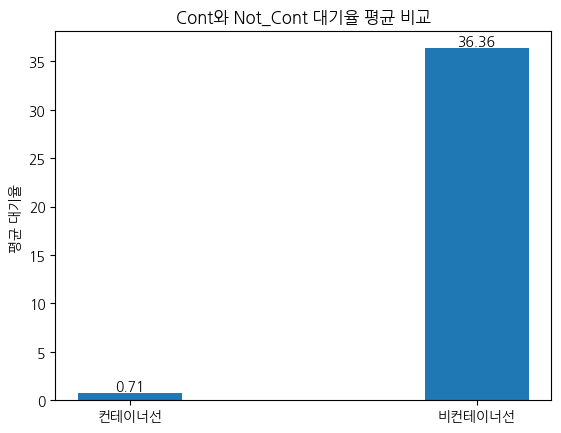

In [32]:
# 막대 그래프 생성
categories = ['컨테이너선', '비컨테이너선']
values = [Cont, Non_Cont]

fig, ax = plt.subplots()
bars = ax.bar(categories, values, width=0.3)  # width 조절

# 각 막대에 대한 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', color='black', fontsize=10)

# 그래프 제목과 레이블 설정
ax.set_title('Cont와 Not_Cont 대기율 평균 비교')
ax.set_ylabel('평균 대기율 ')

# 그래프 표시
plt.show()


# 액/비액체

In [38]:
ac = fil_df[fil_df['선박용도'].isin(['석유제품 운반선','케미칼 운반선','LPG 운반선','기타 유조선','원유운반선','케미칼가스 운반선','LNG 운반선'])]['대기율'].mean()

In [39]:
Non_ac= fil_df[~fil_df['선박용도'].isin(['석유제품 운반선','케미칼 운반선','LPG 운반선','기타 유조선','원유운반선','케미칼가스 운반선','LNG 운반선'])]['대기율'].mean()

## 둘의차이비교그래프

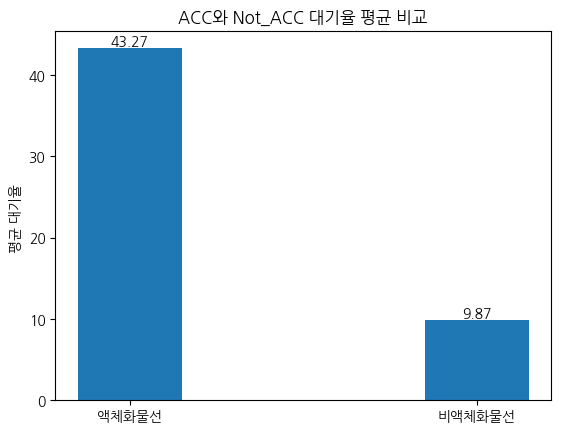

In [40]:
# 막대 그래프 생성
categories = ['액체화물선', '비액체화물선']
values = [ac, Non_ac]

fig, ax = plt.subplots()
bars = ax.bar(categories, values, width=0.3)  # width 조절

# 각 막대에 대한 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', color='black', fontsize=10)

# 그래프 제목과 레이블 설정
ax.set_title('ACC와 Not_ACC 대기율 평균 비교')
ax.set_ylabel('평균 대기율 ')

# 그래프 표시
plt.show()


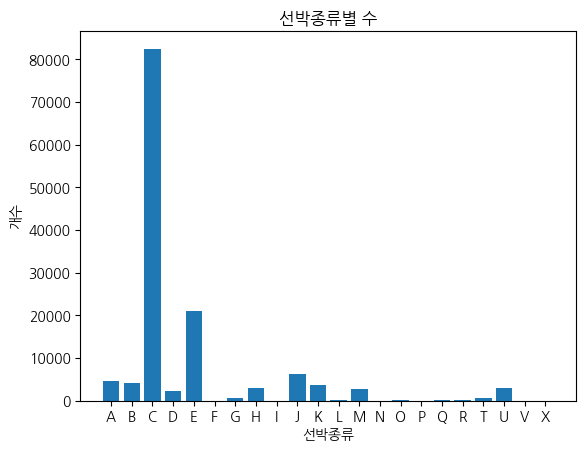

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 각 선박 개수 계산
alphabet_counts = fil_concat['선박용도'].value_counts().sort_index()

# 막대그래프 그리기
plt.bar(alphabet_counts.index, alphabet_counts.values)
plt.xlabel('선박종류')
plt.ylabel('개수')
plt.title('선박종류별 수')
plt.show()


In [16]:
# 울산 각 선박 종류별로 차지하는 비율

In [17]:
fil_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135072 entries, 93006 to 133300
Data columns (total 67 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   항명                    135072 non-null  object 
 1   호출부호                  135072 non-null  object 
 2   선박명                   135072 non-null  object 
 3   입항횟수_연도               135072 non-null  float64
 4   입항횟수_횟수               135072 non-null  float64
 5   구분                    135072 non-null  object 
 6   입출                    135072 non-null  object 
 7   총톤수_x                 135072 non-null  object 
 8   입항일시                  135072 non-null  object 
 9   출항일시                  135072 non-null  object 
 10  수리일시                  135066 non-null  object 
 11  항해구분                  135072 non-null  object 
 12  계선장소_코드               135072 non-null  object 
 13  계선장소_숫자               135072 non-null  int64  
 14  계선장소명                 135072 non-null  object 
 15  선

In [18]:
data = {
    '선박종류': ['C', 'E', 'J', 'A', 'B', 'K', 'H', 'M', 'D', 'U', 'G', 'T', 'O', 'L', 'Q', 'R', 'N', 'P', 'F', 'I', 'V', 'X'],
    '비중': [29378/46545, 7019/46545, 1900/46545, 1528/46545, 1252/46545, 1209/46545, 1048/46545, 1036/46545, 828/46545, 725/46545, 197/46545, 179/46545, 82/46545, 69/46545, 40/46545, 18/46545, 14/46545, 14/46545, 6/46545, 1/46545, 1/46545, 1/46545]
}

T_df = pd.DataFrame(data)
T_df['비중']=T_df['비중']*100

In [19]:
T_df

,선박종류,비중
0,C,63.117413
1,E,15.080030
2,J,4.082071
3,A,3.282845
4,B,2.689870
5,K,2.597486
6,H,2.251584
7,M,2.225803
8,D,1.778924
9,U,1.557632
